In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kmapper as km
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import iqr

In [2]:
df_departures = pd.read_pickle("../../calculated_distances_dep.pkl")

df_arrivals = pd.read_pickle("../../calculated_distances_arr.pkl")

print("Columns all:")
print(df_departures.columns.tolist())

Columns all:
['airportCode', 'date', 'deviation', 'delay']


In [4]:
df_departures['month'] = df_departures['date'].dt.to_period('M').astype(str)

df_dep_by_airport_month = df_departures.groupby(['airportCode', 'month']).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()

df_dep_by_airport_month.columns = ['airportCode', 'month',
                                   'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                                   'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_arrivals['month'] = df_arrivals['date'].dt.to_period('M').astype(str)

df_arr_by_airport_month = df_arrivals.groupby(['airportCode', 'month']).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()


df_arr_by_airport_month.columns = ['airportCode', 'month',
                                  'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                                  'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_all_by_airport_month = pd.merge(df_dep_by_airport_month, df_arr_by_airport_month, on=['airportCode', 'month'], suffixes=('_dep', '_arr'))



print(df_all_by_airport_month.head())

print(df_all_by_airport_month.shape)

  airportCode    month  deviation_mean_dep  deviation_median_dep  \
0        GCFV  2018-03         2488.185867           1659.180216   
1        GCFV  2018-04         2304.741230           1457.032245   
2        GCFV  2018-05         2282.433072           1237.036851   
3        GCFV  2018-06         2349.673899           1351.731239   
4        GCFV  2018-07         2409.805150           1380.988761   

   deviation_std_dep  deviation_iqr_dep  delay_mean_dep  delay_median_dep  \
0        2573.510544        2468.373117       -1.643083         -1.166667   
1        2364.719687        2380.344709       -2.127429         -1.800000   
2        2589.658141        2377.953228       -2.161609         -1.558333   
3        2664.935147        2373.096170       -2.179420         -1.516667   
4        2678.678937        2530.487739       -2.177138         -1.700000   

   delay_std_dep  delay_iqr_dep  deviation_mean_arr  deviation_median_arr  \
0       7.813541       8.687500         3264.238976

In [6]:
df_dep_by_airport_month.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_dep_by_airport_month.isna().sum())

print()
df_arr_by_airport_month.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_arr_by_airport_month.isna().sum())


print()
df_all_by_airport_month.fillna({'deviation_std_dep': 0.0, 'delay_std_dep': 0.0, 'deviation_std_arr': 0.0, 'delay_std_arr': 0.0}, inplace=True)
print(df_all_by_airport_month.isna().sum())

airportCode         0
month               0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

airportCode         0
month               0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

airportCode             0
month                   0
deviation_mean_dep      0
deviation_median_dep    0
deviation_std_dep       0
deviation_iqr_dep       0
delay_mean_dep          0
delay_median_dep        0
delay_std_dep           0
delay_iqr_dep           0
deviation_mean_arr      0
deviation_median_arr    0
deviation_std_arr       0
deviation_iqr_arr       0
delay_mean_arr          0
delay_median_arr        0
delay_std_arr           0
delay_iqr_arr           0
dtype: int64


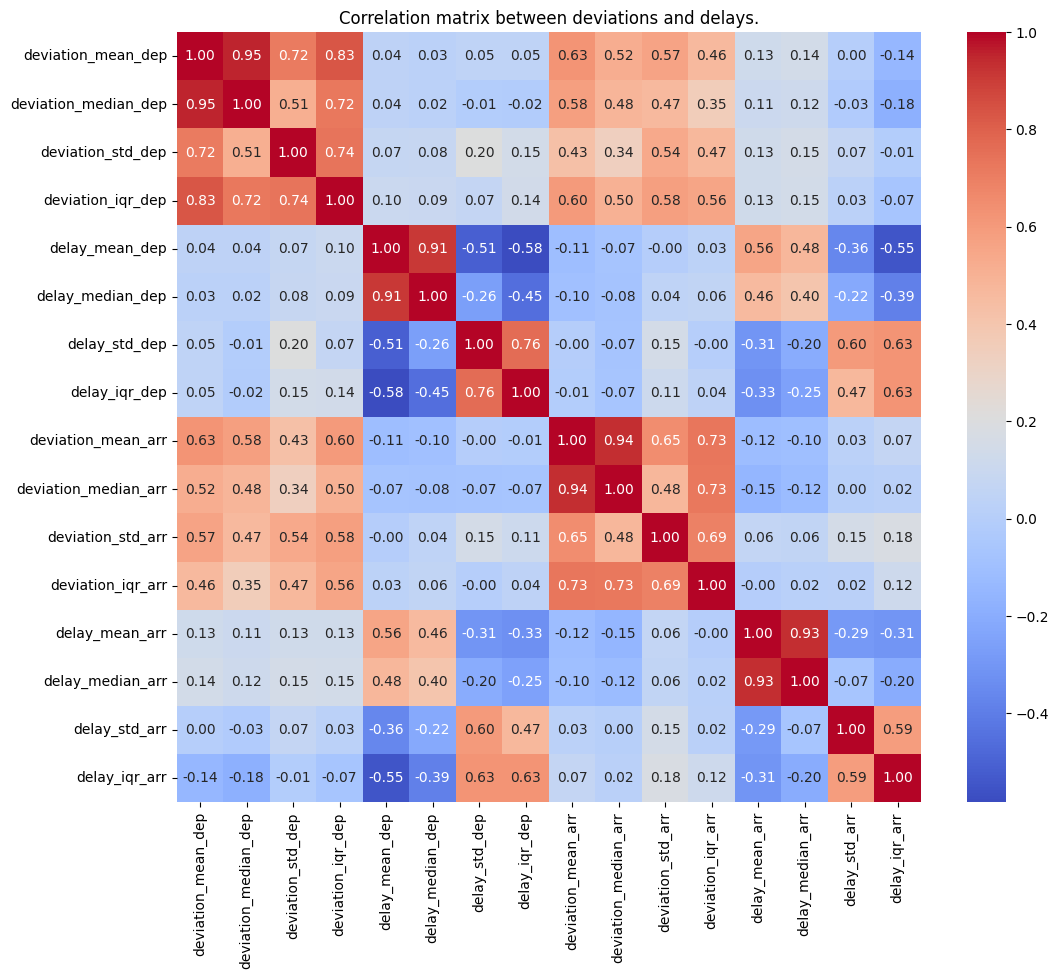

In [7]:
df_numeric = df_all_by_airport_month.drop(columns=['airportCode', 'month'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between deviations and delays.")
plt.show()

In [8]:
X_dep = df_dep_by_airport_month.drop(columns=['airportCode', 'month']).dropna()

print(X_dep.head())
print()

scaler = StandardScaler()
X_scaled_dep = scaler.fit_transform(X_dep)

custom_tooltips_dep = np.array([
    f"{row['month']} – {row['airportCode']}" for _, row in df_dep_by_airport_month.iterrows()
])


print(X_scaled_dep)

   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     2488.185867       1659.180216    2573.510544    2468.373117   -1.643083   
1     2304.741230       1457.032245    2364.719687    2380.344709   -2.127429   
2     2282.433072       1237.036851    2589.658141    2377.953228   -2.161609   
3     2349.673899       1351.731239    2664.935147    2373.096170   -2.179420   
4     2409.805150       1380.988761    2678.678937    2530.487739   -2.177138   

   delay_median  delay_std  delay_iqr  
0     -1.166667   7.813541   8.687500  
1     -1.800000   7.802274   9.241667  
2     -1.558333   6.508721   8.566667  
3     -1.516667   6.914490   8.808333  
4     -1.700000   7.198561   9.083333  

[[ 0.89621603  0.37018198  1.5465536  ...  0.2702854  -0.25488494
  -0.05894336]
 [ 0.66287883  0.10572371  1.22823019 ...  0.13283029 -0.25680661
   0.03676393]
 [ 0.63450339 -0.18208328  1.5711723  ...  0.18528026 -0.47742032
  -0.07981187]
 ...
 [ 0.88091014  0.914996 

In [9]:
X_arr = df_arr_by_airport_month.drop(columns=['airportCode', 'month']).dropna()

print(X_arr.head())
print()

scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_arr)

custom_tooltips_arr = np.array([
    f"{row['month']} – {row['airportCode']}" for _, row in df_arr_by_airport_month.iterrows()
])

print(X_scaled_arr)


   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     3264.238976       4115.373617    2494.795965    4932.410557   -4.506878   
1     3085.585815       3782.937031    2560.506920    4961.799314   -3.833325   
2     2920.609670       3543.031608    2608.217875    4914.014271   -3.365515   
3     3032.563604       3713.065678    2626.399088    4962.958403   -3.922861   
4     3098.902492       3851.207115    2588.007047    5032.188562   -4.084168   

   delay_median  delay_std  delay_iqr  
0     -4.866667   6.856096  10.941667  
1     -3.516667   6.954226   9.833333  
2     -2.566667   6.738440   9.825000  
3     -3.416667   6.727846   9.762500  
4     -3.750000   6.858052   9.650000  

[[ 2.43341122  3.62114364  1.88115688 ... -0.63661223 -0.2795364
   0.71081474]
 [ 2.17453472  3.19272977  1.98884423 ... -0.38314754 -0.26549219
   0.4697859 ]
 [ 1.93547684  2.88356161  2.06703311 ... -0.2047835  -0.29637504
   0.46797365]
 ...
 [ 0.13944873  0.13230889

In [10]:
X_all = df_all_by_airport_month.drop(columns=['airportCode', 'month']).dropna()

print(X_all.head())
print()

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

custom_tooltips_all = np.array([
    f"{row['month']} – {row['airportCode']}" for _, row in df_all_by_airport_month.iterrows()
])

print(X_scaled_all)

   deviation_mean_dep  deviation_median_dep  deviation_std_dep  \
0         2488.185867           1659.180216        2573.510544   
1         2304.741230           1457.032245        2364.719687   
2         2282.433072           1237.036851        2589.658141   
3         2349.673899           1351.731239        2664.935147   
4         2409.805150           1380.988761        2678.678937   

   deviation_iqr_dep  delay_mean_dep  delay_median_dep  delay_std_dep  \
0        2468.373117       -1.643083         -1.166667       7.813541   
1        2380.344709       -2.127429         -1.800000       7.802274   
2        2377.953228       -2.161609         -1.558333       6.508721   
3        2373.096170       -2.179420         -1.516667       6.914490   
4        2530.487739       -2.177138         -1.700000       7.198561   

   delay_iqr_dep  deviation_mean_arr  deviation_median_arr  deviation_std_arr  \
0       8.687500         3264.238976           4115.373617        2494.795965   
1 

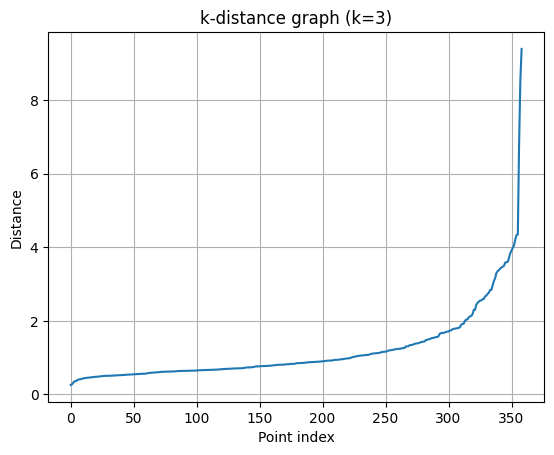

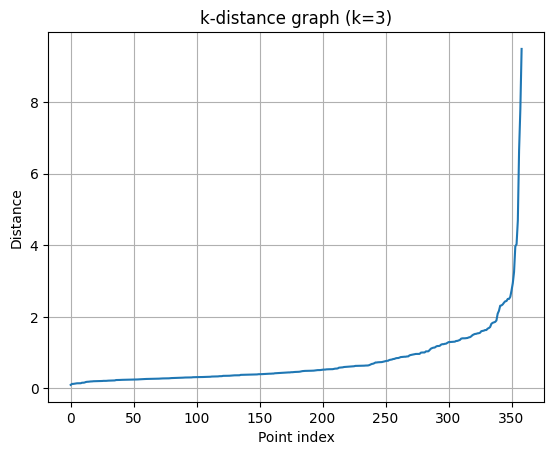

In [11]:

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_dep)
distances, indices = neighbors_fit.kneighbors(X_scaled_arr)
distances = np.sort(distances[:, 2])

plt.plot(distances)
plt.title("k-distance graph (k=3)")
plt.xlabel("Point index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X_scaled_arr)
distances, indices = neighbors_fit.kneighbors(X_scaled_arr)
distances = np.sort(distances[:, 2])

plt.plot(distances)
plt.title("k-distance graph (k=3)")
plt.xlabel("Point index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

In [ ]:

mapper = km.KeplerMapper()

pca = PCA(n_components=3)
filter_values_dep = pca.fit_transform(X_scaled_dep)

node_color_function_dep = X_scaled_dep[:, X_dep.columns.get_loc("delay_mean")]


graph_dep = mapper.map(filter_values_dep,
                    X_scaled_dep,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_dep, 
                 path_html="mapper_output_dep.html", 
                 custom_tooltips=custom_tooltips_dep, 
                 node_color_function=node_color_function_dep)

c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:344: RuntimeWarning: invalid value encountered in scalar divide
  height = np.floor(((bar / max_bucket_value) * 100) + 0.5)
c:\Users\Raúl\Documents\MASTER\TFM\env\lib\site-packages\kmapper\visuals.py:345: RuntimeWarning: invalid value encountered in scalar divide
  perc = round((bar / sum_bucket_value) * 100.0, 1)


'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [ ]:
pca = PCA(n_components=3)
filter_values_arr = pca.fit_transform(X_scaled_arr)

node_color_function_arr = X_scaled_arr[:, X_arr.columns.get_loc("delay_mean")]


graph_arr = mapper.map(filter_values_arr, 
                    X_scaled_arr,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_arr, 
                 path_html="mapper_output_arr.html", 
                 custom_tooltips=custom_tooltips_arr, 
                 node_color_function=node_color_function_arr)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh

In [ ]:
pca = PCA(n_components=3)
filter_values_all = pca.fit_transform(X_scaled_all)

node_color_function_all = (
    0.5 * X_scaled_all[:, X_all.columns.get_loc("delay_mean_dep")] +
    0.5 * X_scaled_all[:, X_all.columns.get_loc("delay_mean_arr")]
)

graph_all = mapper.map(filter_values_all, 
                    X_scaled_all,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=5, perc_overlap=0.2)
)

mapper.visualize(graph_all, 
                 path_html="mapper_output_all.html", 
                 custom_tooltips=custom_tooltips_all,
                 node_color_function=node_color_function_all)

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Kepler Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;\n  font-weigh